In [7]:
import os
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
link_1 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2021 год, Южно-Камчатский заказник, Охотоморское побережье (1)/'
         
link_2 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2021 год, Южно-Камчатский заказник, Охотоморское побережье (1)/участок на 4 речке'
         
link_3 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' + \
         '2021 год, Южно-Камчатский заказник, Охотоморское побережье (2)/'

link_4 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2023 год лето, Южно-Камчатский заказник, Охотоморское побережье/1 km'
         
link_5 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2023 год осень, сопредельная с Южно-Камчатским заказником территория, Охотоморское побережье/' +\
         'от 1 речки в сторону поселка'

link_6 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2023 год осень, сопредельная с Южно-Камчатским заказником территория, Охотоморское побережье/' +\
         'участок ближе к поселку'
         
link_7 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         'P010_Okhotskoe_more_19_07_2020/' +\
         'Photo'

### Пример изображения в высоком разрешении:

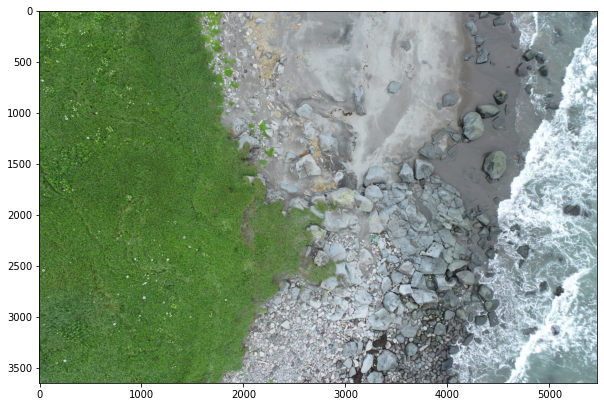

In [12]:
img = Image.open(os.path.join(link_2, 'DJI_0236.JPG'))
img = np.asarray(img)

plt.figure(figsize=(10, 10))
plt.imshow(img);

### Зададим генератор, который будет резать изображения на кропы размера 256 x 256.

In [22]:
from dataset_coroutine import dataset_coroutine

data_cor = dataset_coroutine(
    [link_1, link_2, link_3, link_4, link_5, link_6, link_7], # откуда брать изображения
    each_n=10, # Какое количество из каждой директории
    total_n=np.inf, # Верхняя граница на общее число итераций корутины
    size=256 # размер изображения
)

### Зада модель, которая будет сжимать гистограмму цветов до размерности 2

In [14]:
from assign_labels import load_reducer

reducer = load_reducer()

2024-05-14 12:31:16.064080: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 12:31:18.016407: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 12:31:22.411365: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Запустим код, на выходе получим 

In [18]:
batch_size = 50
datasets_path='.'
dataset_name = 'examples'
stargan_dataset_path = os.path.join(datasets_path, dataset_name)

In [21]:
from generate_stargan_dataset import make_stargandataset_dir, generate_stargan_dataset

make_stargandataset_dir(datasets_path=datasets_path, name=dataset_name, del_prev=False)
generate_stargan_dataset(reducer, data_cor, 
                         batch_size=batch_size, 
                         stargan_dataset_path=stargan_dataset_path)

odc_number:  10
odc_number:  10
odc_number:  10
odc_number:  10
51 images was saved: 4s
odc_number:  10
odc_number:  10
odc_number:  10
total_number:  70


StopIteration: 70

### Пример разбиения по классам, в запуске на 175000 кропов. 

1:  11195


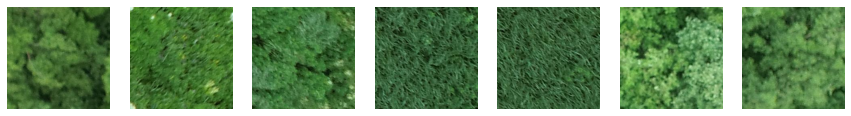

2:  6993


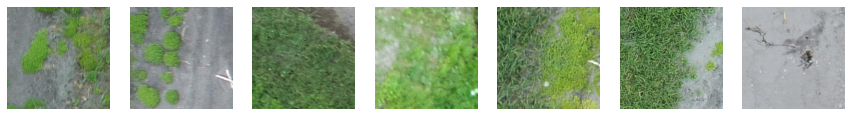

3:  4741


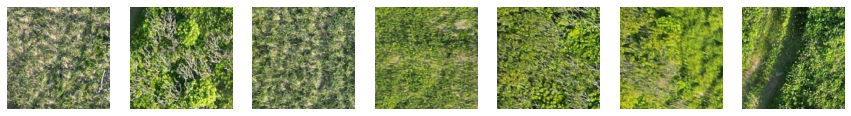

4:  2363


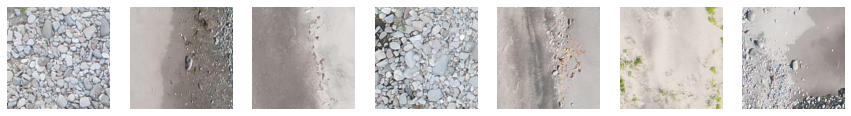

5:  3037


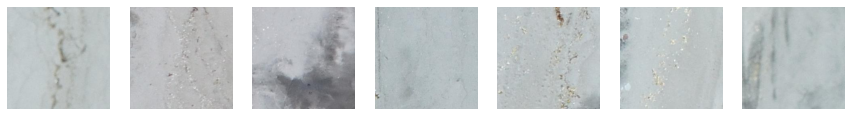

6:  10019


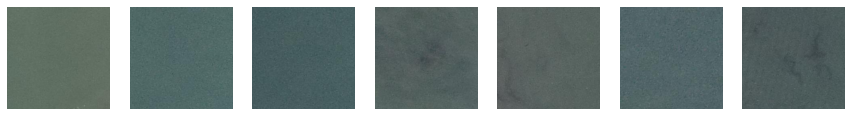

7:  16747


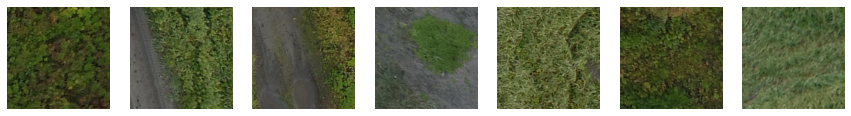

8:  11048


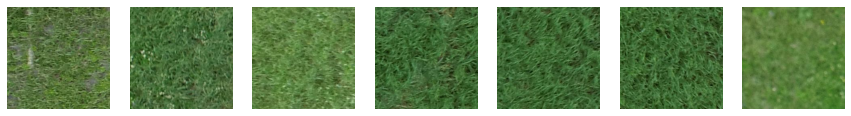

9:  38980


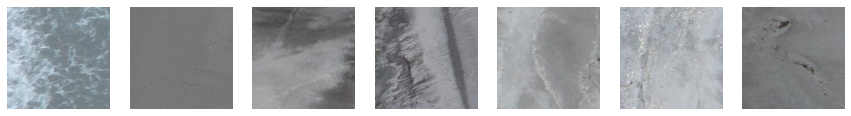

10:  21566


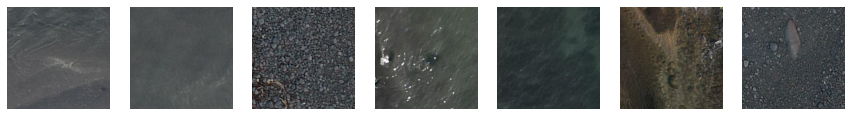

11:  48312


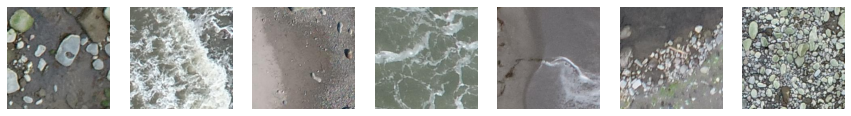

total:  175001


In [8]:
from PIL import Image
import matplotlib.pyplot as plt
ncols = 7

s = 0

class_pattern = 'class_00'
for i in range(1, 12):
    class_name = str(i)
    class_name = class_pattern[:-len(class_name)] + class_name
    
    class_path = os.path.join(stargan_dataset_path, class_name)
    list_dir = os.listdir(class_path)
    if len(list_dir) > 0:
        names = np.random.choice(list_dir, ncols)
        print(f'{i}: ', len(list_dir))
        s += len(list_dir)

        fig, axes = plt.subplots(ncols=ncols, figsize=(15, 2))
        for i, name in enumerate(names):
            img = Image.open(os.path.join(class_path, name)).convert('RGB')
            img = np.asarray(img)
            axes[i].imshow(img)
            axes[i].axis('off')
    plt.show()
    
print('total: ', s)